REFERENCES
  1. https://medium.com/analytics-vidhya/predicting-a-flight-delays-1582a4238770

plot_modelibraries and Settings

In [ ]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

In [ ]:
# Get the SageMaker Execution Role
# REF. https://docs.aws.amazon.com/sagemaker/latest/dg/automatic-model-tuning-ex-role.html
role = get_execution_role()
print(role)

# 1.) Download data exported by Flow

In [ ]:
# bucket = 'sagemaker-us-west-2-506926764659/export-flow-04-07-57-50-b8afb5f9/output/data-wrangler-flow-processing-04-07-57-50-b8afb5f9/08c22fcd-3f27-4f71-9d3e-9e3d862f1f4b/default'
# data_key = 'part-00000-0baa32b8-7991-4bd1-96dc-abb1ed132c3a-c000.csv'

bucket = 'sagemaker-us-west-2-506926764659/export-flow-04-17-14-40-211a5e9b/output/data-wrangler-flow-processing-04-17-14-40-211a5e9b/b788d6a4-beaf-44c1-a0f2-db07f3c97b00/default'
data_key = 'part-00000-c2823dcf-d541-477f-a27b-1c4e20233e0a-c000.csv'

# bucket = 'from-public-data/carrier-perf/transformed/airOT2011'
# data_key = 'airOT201101.csv'

data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_csv(data_location)
df

Add Delay Features

In [ ]:
# late_flight = []
# for i in df['DEP_DELAY']:
#     if i > 0 : late_flight.append('late')
#     else: late_flight.append('not_late')
        
# df['late_flight'] = late_flight
# df

In [ ]:
# List columns header
list(df.columns)

## EDA

### Pairwise Relationship
https://medium.com/analytics-vidhya/predicting-a-flight-delays-1582a4238770

Goal to analyze:
  1. *Features Correlation*.  Assess pairwise relationships between 3+ variables.
  2. *Multicollinearity*.  Assess correlation between 2+ variables.
  3. *Data Linerly Separable?*

### Features Correlation Heatmap

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

# 2.) Install PyCaret

In [ ]:
!pip install pycaret
# !pip install pycaret-nightly

# 3.) Getting the Data

In [ ]:
data = df.sample(frac=0.95, random_state=168)
data_unseen = df.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

# 4.) Setting up environment in PyCaret

In [ ]:
from pycaret.classification import *

In [13]:
exp = setup(data = data, target = 'late_flight', session_id=123,
            numeric_features = ['YR','MO','DAY_OF_MONTH','DAY_OF_WEEK']
#             ignore_features = [
# #                 'YR',
# #                 'MO',
# #                 'DAY_OF_MONTH',
# #                 'DAY_OF_WEEK',
#                 'ORIGIN',
#                 'DEST'
#             ]
           )


# exp_clf101 = setup(data, target = 'late_flight', session_id=168, 
#             ignore_features = [
#                 'FL_DATE', 
#                 'UNIQUE_CARRIER', 
#                 'TAIL_NUM', 
#                 'FL_NUM', 
#                 'ORIGIN_AIRPORT_ID', 
#                 'ORIGIN_STATE_ABR', 
#                 'DEST_AIRPORT_ID',
#                 'DEST_STATE_ABR',
#                 'CRS_DEP_TIME',
#                 'DEP_TIME',
#                 'DEP_DELAY_NEW',
#                 'DEP_DEL15',
#                 'DEP_DELAY_GROUP',
#                 'TAXI_OUT',
#                 'WHEELS_OFF',
#                 'WHEELS_ON',
#                 'TAXI_IN',
#                 'CRS_ARR_TIME',
#                 'ARR_TIME',
#                 'ARR_DELAY_NEW',
#                 'ARR_DEL15',
#                 'ARR_DELAY_GROUP',
#                 'CANCELLED',
#                 'CANCELLATION_CODE',
#                 'DIVERTED',
#                 'CRS_ELAPSED_TIME',
#                 'AIR_TIME',
#                 'FLIGHTS',
#                 'DISTANCE_GROUP',
#                 'CARRIER_DELAY',
#                 'WEATHER_DELAY',
#                 'NAS_DELAY',
#                 'SECURITY_DELAY',
#                 'LATE_AIRCRAFT_DELAY',
#                 'Unnamed: 44'
#             ])

,Description,Value
0,session_id,123
1,Target,late_flight
2,Target Type,Binary
3,Label Encoded,"late: 0, not_late: 1"
4,Original Data,"(451960, 14)"
5,Missing Values,True
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# 5.) Comparing All Models

In [14]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,7.5470
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2100
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,11.9220
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2510
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,20.0530
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.8080
et,Extra Trees Classifier,0.9984,1.0000,0.9999,0.9974,0.9986,0.9966,0.9966,18.0370
svm,SVM - Linear Kernel,0.9794,0.0000,0.9937,0.9744,0.9835,0.9563,0.9583,1.9870
nb,Naive Bayes,0.8984,0.9662,0.9651,0.8779,0.9194,0.7827,0.7892,0.1530
knn,K Neighbors Classifier,0.8679,0.9260,0.9422,0.8532,0.8955,0.7171,0.7236,3.2290


# 6.) Create a Model

In [15]:
# List all avaialble classification models in PyCaret library
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## 6.1 Logistic Regression

In [16]:
lr = create_model('lr')

# trained model object is stored as `lr`
print(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## 6.2 Gradient Boosting Classifier

In [17]:
gbc = create_model('gbc')

# trained model object is stored as `gbc`
print(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# 7. Tune a Model

## 7.1 Logistic Regression

In [20]:
tuned_lr = tune_model(lr)

# tuned model object is stored as `tuned_lr`
print(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## 7.2 Gradient Boosting Classifier

In [21]:
tuned_gbc = tune_model(gbc)

# tuned model object is stored as `tuned_gbc`
print(tuned_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# 8. Plot Model's Performance

## 8.1 Logistic Regression

### 8.1.1 Features Importance

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


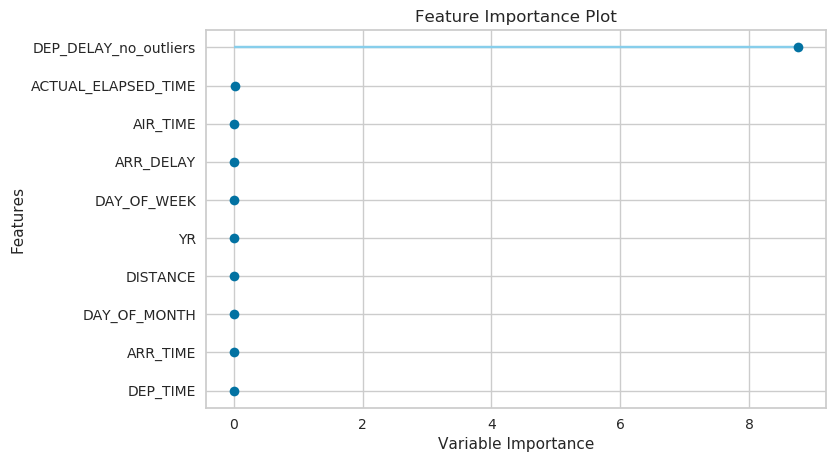

In [22]:
plot_model(tuned_lr, plot='feature')

### 8.1.2 Recursive Feature Selection

IntProgress(value=0, description='Processing: ', max=5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-e0e2ef4fa6c5>", line 1, in <module>
    plot_model(tuned_lr, plot='rfe')
  File "/opt/conda/lib/python3.7/site-packages/pycaret/classification.py", line 1549, in plot_model
    display_format=display_format,
  File "/opt/conda/lib/python3.7/site-packages/pycaret/internal/tabular.py", line 7215, in plot_model
    ret = locals()[plot]()
  File "/opt/conda/lib/python3.7/site-packages/pycaret/internal/tabular.py", line 6670, in rfe
    display_format=display_format,
  File "/opt/conda/lib/python3.7/site-packages/pycaret/internal/plots/yellowbrick.py", line 88, in show_yellowbrick_plot
    visualizer.fit(X_train, y_train, **fit_kwargs_and_kwargs)
  File "/opt/conda/lib/python3.7/site-packages/yellowbrick/model_selection/rfecv.py", line 197, in fit
    scores.append(cross_val

KeyboardInterrupt: 

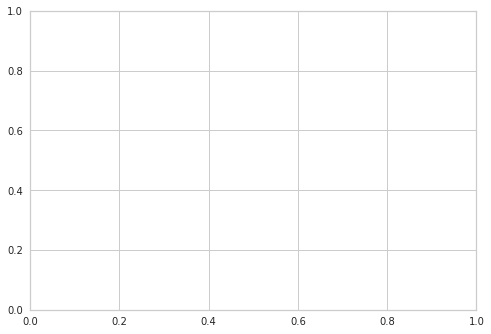

In [23]:
plot_model(tuned_lr, plot='rfe')

## 8.2 Gradient Boosting Classifier

### 8.2.1 Features Importance

In [ ]:
plot_model(tuned_gbc, plot='feature')

### 8.2.2 Recursive Feature Selection

In [ ]:
plot_model(tuned_gbc, plot='rfe')